In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plots
from re import search

In [49]:
koosh1 = pd.read_csv("data/koosh_dux.csv")
cat = pd.read_csv("data/cat_dux.csv")
joe = pd.read_csv("data/joey_dux.csv")
tatum = pd.read_csv("data/tatum_dux.csv")
stefano = pd.read_csv("data/stefano_dux.csv")
koosh = pd.concat([koosh1, cat, joe, tatum, stefano])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [50]:
fn_list = koosh["First Name"].tolist()
ln_list = koosh["Last Name"].tolist()
name_list = []
for i in range(len(koosh)):
    name_list.append(fn_list[i] + " " + ln_list[i])
koosh["Name"] = name_list
koosh = koosh.drop(["First Name", "Last Name"], 1)

In [51]:
koosh = koosh.drop_duplicates("Name", keep = "first")

In [52]:
koosh.columns

Index(['Company', 'CompanyProfile', 'CompanyWebsite', 'Connections', 'Degree',
       'Email', 'From', 'IM', 'Industry', 'Location',
       ...
       'Summary', 'Title', 'Twitter', 'Unnamed: 233', 'Unnamed: 328',
       'Unnamed: 367', 'Unnamed: 488', 'VisitTime', 'id', 'Name'],
      dtype='object', length=546)

In [53]:
lst = []
for i in range(20):
    lst.append("Skill-" + str(i))
lst

['Skill-0',
 'Skill-1',
 'Skill-2',
 'Skill-3',
 'Skill-4',
 'Skill-5',
 'Skill-6',
 'Skill-7',
 'Skill-8',
 'Skill-9',
 'Skill-10',
 'Skill-11',
 'Skill-12',
 'Skill-13',
 'Skill-14',
 'Skill-15',
 'Skill-16',
 'Skill-17',
 'Skill-18',
 'Skill-19']

In [54]:
koosh_cols_cleaned = koosh[['Name', 'Title', 'Summary', 'Skill-0',
 'Skill-1',
 'Skill-2',
 'Skill-3',
 'Skill-4',
 'Skill-5',
 'Skill-6',
 'Skill-7',
 'Skill-8',
 'Skill-9',
 'Skill-10',
 'Skill-11',
 'Skill-12',
 'Skill-13',
 'Skill-14',
 'Skill-15',
 'Skill-16',
 'Skill-17',
 'Skill-18',
 'Skill-19']]
koosh_cols_cleaned.head()

,Name,Title,Summary,Skill-0,Skill-1,Skill-2,Skill-3,Skill-4,Skill-5,Skill-6,...,Skill-10,Skill-11,Skill-12,Skill-13,Skill-14,Skill-15,Skill-16,Skill-17,Skill-18,Skill-19
0,Stephanie Moore,Data Scientist @ The Data Standard || Tech Blo...,I am passionate about turning complex data int...,Python,Data Visualization,Statistical Data Analysis,Project Management,Research,Data Mining,Machine Learning,...,Git,SQL,CSS,JavaScript,Tableau,Hadoop,Apache Spark,Scikit-Learn,Organizational & Writing Skills,Regression Analysis
1,Matthew Rall,Helping enterprises accelerate their AI & ML i...,Results-oriented executive with a strong track...,Management Consulting,Business Strategy,Strategic Consulting,Corporate Development,Strategy,Competitive Analysis,Business Development,...,Financial Analysis,Marketing Strategy,Change Management,Due Diligence,Mergers & Acquisitions (M&A),Market Entry,Start-ups,Corporate Strategy Formulation,Marketing,Growth Strategies
2,Neema Raphael,Global Head of Data Engineering and Chief Data...,"But First, the Data\n Come be part of the data...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mary Gaspar,"Global Head of Data Services & COO, Enterprise...",Global Transformation Executive providing advi...,Business Transformation,Leadership,Quality Management,Business Intelligence,Vendor Management,Business Analysis,IT Strategy,...,Project Management,Project Portfolio Management,Risk Management,IT Management,Software Development Life Cycle (SDLC),Software Project Management,Wealth Management,Process Improvement,Project Management Office (PMO),Strategy
4,Kristin Julbert,"EVP, Head of Application Development & Enterpr...","A senior Financial Services Strategist, and fo...",Banking,Credit,Retail Banking,Commercial Lending,CRM,Marketing,Management,...,Small Business Lending,Customer Satisfaction,Project Management,Project Planning,Program Management,E-commerce,Executive Management,Strategy,Consumer Lending,Commercial Banking


In [55]:
koosh_cols_cleaned.iloc[:, 3:].head()

,Skill-0,Skill-1,Skill-2,Skill-3,Skill-4,Skill-5,Skill-6,Skill-7,Skill-8,Skill-9,Skill-10,Skill-11,Skill-12,Skill-13,Skill-14,Skill-15,Skill-16,Skill-17,Skill-18,Skill-19
0,Python,Data Visualization,Statistical Data Analysis,Project Management,Research,Data Mining,Machine Learning,Microsoft Office,R,HTML,Git,SQL,CSS,JavaScript,Tableau,Hadoop,Apache Spark,Scikit-Learn,Organizational & Writing Skills,Regression Analysis
1,Management Consulting,Business Strategy,Strategic Consulting,Corporate Development,Strategy,Competitive Analysis,Business Development,Business Planning,Strategic Planning,Cross-functional Team Leadership,Financial Analysis,Marketing Strategy,Change Management,Due Diligence,Mergers & Acquisitions (M&A),Market Entry,Start-ups,Corporate Strategy Formulation,Marketing,Growth Strategies
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Business Transformation,Leadership,Quality Management,Business Intelligence,Vendor Management,Business Analysis,IT Strategy,SDLC,Program Management,PMO,Project Management,Project Portfolio Management,Risk Management,IT Management,Software Development Life Cycle (SDLC),Software Project Management,Wealth Management,Process Improvement,Project Management Office (PMO),Strategy
4,Banking,Credit,Retail Banking,Commercial Lending,CRM,Marketing,Management,Process Improvement,Strategic Planning,Leadership,Small Business Lending,Customer Satisfaction,Project Management,Project Planning,Program Management,E-commerce,Executive Management,Strategy,Consumer Lending,Commercial Banking


In [56]:
def skills_to_list(row):
    skills_labels = row[['Skill-0', 'Skill-1','Skill-2','Skill-3','Skill-4','Skill-5', 'Skill-6', 'Skill-7', 'Skill-8','Skill-9', 'Skill-10', 'Skill-11', 'Skill-12', 'Skill-13', 'Skill-14', 'Skill-15', 'Skill-16', 'Skill-17', 'Skill-18', 'Skill-19']].values
    skills_values_l = skills_labels.tolist()
    skills_values_lst = [i.lower() for i in skills_values_l if type(i) == str]
    return skills_values_lst
    

In [57]:
koosh_cols_cleaned["Skills"] = koosh_cols_cleaned.apply(skills_to_list, axis = 1)
koosh_cleaned = koosh_cols_cleaned[["Name", "Title", "Summary", "Skills"]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
koosh_cleaned.head()

,Name,Title,Summary,Skills
0,Stephanie Moore,Data Scientist @ The Data Standard || Tech Blo...,I am passionate about turning complex data int...,"[python, data visualization, statistical data ..."
1,Matthew Rall,Helping enterprises accelerate their AI & ML i...,Results-oriented executive with a strong track...,"[management consulting, business strategy, str..."
2,Neema Raphael,Global Head of Data Engineering and Chief Data...,"But First, the Data\n Come be part of the data...",[]
3,Mary Gaspar,"Global Head of Data Services & COO, Enterprise...",Global Transformation Executive providing advi...,"[business transformation, leadership, quality ..."
4,Kristin Julbert,"EVP, Head of Application Development & Enterpr...","A senior Financial Services Strategist, and fo...","[banking, credit, retail banking, commercial l..."


In [59]:
test = koosh_cleaned.Skills.tolist()[22]
test

['it strategy',
 'data center',
 'security',
 'solution architecture',
 'business process',
 'outsourcing',
 'cloud computing',
 'system deployment',
 'vendor management',
 'enterprise architecture',
 'telecommunications',
 'integration',
 'business analysis',
 'financial services',
 'sdlc',
 'storage',
 'business intelligence',
 'business process improvement',
 'disaster recovery',
 'program management']

In [60]:
skills_list = koosh_cleaned.Skills.tolist()
combined = []
for i in skills_list:
    for j in i:
        combined.append(j)

In [61]:
a = pd.DataFrame(combined)
counts = a[0].value_counts().to_frame()
counts.index.name = "skills"
counts.reset_index(inplace=True)
counts = counts.rename(columns = {0: "count"})
counts

,skills,count
0,data analysis,1954
1,business analysis,1793
2,project management,1690
3,business intelligence,1651
4,sql,1617
...,...,...
8381,agile and scrum methodologies,1
8382,edw,1
8383,blue ocean strategy,1
8384,lean startup,1


In [62]:
programmer = ["sql", "sdlc", "software development", "agile methodologies", "data warehousing", 
                                "enterprise architecture", "cloud computing", "machine learning",
                                "data mining", "java", "databases", "big data", "requirements analysis", 
                                "enterprise software", "c++", "microsoft sql server", "software engineering", 
                                "linux", "etl", "data center", "solution architecture", "oracle", "hadoop", 
                                "distributed systems", "javascript", "unix", "soa", "saas", "product development",
                                "c", "scrum", "database design", "software development life cycle (sdlc)", "mysql",
                                "architecture", "data management", "programming", "c#", "integration", 
                             "software project management", "data integration", "xml", "perl"]
             
stats_math = ["r", "statistics", "microsoft excel", "sas", "research", "statistical modeling", "data modeling", 
             "matlab", "predictive modeling", "algorithms", "predictive analytics", "microsoft excel", 
              "sas programming", "market research", "mathematica, modeling", "stata", "statistical data analysis",
              "problem solving", "mathematics", "marketing research", "financial modeling", "quantitative analytics",
              "forecasting", "mathematical modeling"
             ]

storyteller = ["r", "data analysis", "business analysis", "analytics", "python", "analysis", "microsoft excel", 
               "financial analysis", "tableau", "data visualization", "programming",
              "web analytics", "python (programming language)", "data analytics",
              "big data analytics", "marketing analytics", "marketing", "public speaking", "team building",
              "team leadership", "cross-functional team leadership", "microsoft office", "business analytics"]

domain_expert = ["project management", "product management", "business intelligence", "management", "leadership", "strategy", 
                "program management", "vendor management", "process improvement", "risk management", 
                 "strategic planning", "business process improvement", "business strategy", 
                  "insurance", "change management", "start-ups", 
                 "financial servives", "business development", "crm", "disaster recovery",
                 "business process", "management consulting", "portfolio management", "finance", "requirements gathering",
                 "banking", "e-commerce", "customer service",
                 "consulting", "security", "telecommunications", "marketing strategy", "it strategy", "marketing",
                 "financial services", "it management", "entrepreneurship"
                 ]

In [63]:
m_len = max(len(programmer), len(stats_math), len(storyteller), len(domain_expert))
m_len

43

In [64]:
print(m_len / len(stats_math))

1.7916666666666667


In [65]:
counts_checker = counts
for i, row in counts_checker.iterrows():
    a = f"{row['skills']}"
    if ((a in programmer) or (a in stats_math) or (a in storyteller) or (a in domain_expert)):
        counts_checker = counts_checker.loc[counts_checker["skills"] != row["skills"]]
counts_checker.head()

,skills,count
62,data science,405
77,equities,359
78,fixed income,354
86,derivatives,310
95,microsoft word,282


In [66]:
koosh_cleaned.head()

,Name,Title,Summary,Skills
0,Stephanie Moore,Data Scientist @ The Data Standard || Tech Blo...,I am passionate about turning complex data int...,"[python, data visualization, statistical data ..."
1,Matthew Rall,Helping enterprises accelerate their AI & ML i...,Results-oriented executive with a strong track...,"[management consulting, business strategy, str..."
2,Neema Raphael,Global Head of Data Engineering and Chief Data...,"But First, the Data\n Come be part of the data...",[]
3,Mary Gaspar,"Global Head of Data Services & COO, Enterprise...",Global Transformation Executive providing advi...,"[business transformation, leadership, quality ..."
4,Kristin Julbert,"EVP, Head of Application Development & Enterpr...","A senior Financial Services Strategist, and fo...","[banking, credit, retail banking, commercial l..."


In [67]:
df = koosh_cleaned
df["Type"] = ""
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Title,Summary,Skills,Type
0,Stephanie Moore,Data Scientist @ The Data Standard || Tech Blo...,I am passionate about turning complex data int...,"[python, data visualization, statistical data ...",
1,Matthew Rall,Helping enterprises accelerate their AI & ML i...,Results-oriented executive with a strong track...,"[management consulting, business strategy, str...",
2,Neema Raphael,Global Head of Data Engineering and Chief Data...,"But First, the Data\n Come be part of the data...",[],
3,Mary Gaspar,"Global Head of Data Services & COO, Enterprise...",Global Transformation Executive providing advi...,"[business transformation, leadership, quality ...",
4,Kristin Julbert,"EVP, Head of Application Development & Enterpr...","A senior Financial Services Strategist, and fo...","[banking, credit, retail banking, commercial l...",


In [68]:
for i, row in df.iterrows():
    row_title = row["Title"]
    row_skills = row["Skills"]
    row_bio = row["Summary"]
    
    if (len(row_skills) < 2):
        row["Type"] = "NA"
        
    else:
        data_eng = 0
        stats = 0
        story = 0
        biz = 0

        for j in row_skills:
            if j in programmer:
                data_eng += 1
            if j in stats_math:
                stats += 1.8
            if j in storyteller:
                story += 1.9
            if j in domain_expert:
                biz += 1.2

        lst = [data_eng, stats, story, biz]
        label = max(lst)

        if label == data_eng:
            row["Type"] = "Data Engineer/Architect/Programmer"
        if label == stats:
            row["Type"] = "Mathematician/Statistician"
        if label == story:
            row["Type"] = "Data Storyteller"
        if label == biz:
            row["Type"] = "Domain Expert"       
df = df.loc[df.Type != "NA"]
df.head()

,Name,Title,Summary,Skills,Type
0,Stephanie Moore,Data Scientist @ The Data Standard || Tech Blo...,I am passionate about turning complex data int...,"[python, data visualization, statistical data ...",Data Storyteller
1,Matthew Rall,Helping enterprises accelerate their AI & ML i...,Results-oriented executive with a strong track...,"[management consulting, business strategy, str...",Domain Expert
3,Mary Gaspar,"Global Head of Data Services & COO, Enterprise...",Global Transformation Executive providing advi...,"[business transformation, leadership, quality ...",Domain Expert
4,Kristin Julbert,"EVP, Head of Application Development & Enterpr...","A senior Financial Services Strategist, and fo...","[banking, credit, retail banking, commercial l...",Domain Expert
5,Gary Barr,Chief Data Officer,* Highly motivated and experienced executive s...,"[financial services, enterprise software, info...",Domain Expert


In [69]:
statisticians = df.loc[df.Type == "Mathematician/Statistician"]
statisticians.head()

,Name,Title,Summary,Skills,Type
20,Christine Birtel,"SVP, Head of Data Transformation and Marketing...",Customer Experience Insights and Analytics lea...,"[black belt, market research, minitab, statist...",Mathematician/Statistician
25,Mike Soistman,"SVP, Enterprise Complaints Data Analytics and ...",I lead the Enterprise Customer Excellence’s Co...,"[forecasting, gaap, securitization, enterprise...",Mathematician/Statistician
68,George Okammor,Director / Senior Group Manager - Business Arc...,An Information Technology professional with ex...,"[analytics, sas, credit cards, financial risk,...",Mathematician/Statistician
100,Meninder Purewal,"Data Scientist, Equities",I am an experienced Quant with over a decade o...,"[physics, quantitative finance, financial risk...",Mathematician/Statistician
170,Mimi Park,"Executive Director, Data Science & Machine Lea...",(Please note: I am not able to respond to mess...,"[hadoop, hive, apache pig, unix shell scriptin...",Mathematician/Statistician


In [70]:
storytellers = df.loc[df.Type == "Data Storyteller"]
storytellers.head()

,Name,Title,Summary,Skills,Type
0,Stephanie Moore,Data Scientist @ The Data Standard || Tech Blo...,I am passionate about turning complex data int...,"[python, data visualization, statistical data ...",Data Storyteller
24,Robert Miller,Head of Enterprise Data Standards Team at Citi,Experienced Head Of Content with a demonstrate...,"[accounting, auditing, finance, banking, busin...",Data Storyteller
26,Kat Tatochenko,Global Head of Data at MarketAxess,,"[market data, reference data, trading, solutio...",Data Storyteller
33,James Miller,Executive Director at ISS | Institutional Shar...,,"[sql, databases, corporate governance, account...",Data Storyteller
46,Michelle Zhou,Director at BNY Mellon,Accomplished Data Governance leader with a ver...,"[financial reporting, financial analysis, fina...",Data Storyteller


In [71]:
domain_experts = df.loc[df.Type == "Domain Expert"]
# for i in domain_experts.Skills.tolist():
#     counter = 0
#     for j in i:
#         if ("management" in j):
#             counter = counter + 1
#     if counter < 2:
#         continue
#     else:
#         counter1 = 0
#         for p in i:
#             while counter1 < counter:
#                 if "management" in p:
#                     p = "-1"
domain_experts.head()

,Name,Title,Summary,Skills,Type
1,Matthew Rall,Helping enterprises accelerate their AI & ML i...,Results-oriented executive with a strong track...,"[management consulting, business strategy, str...",Domain Expert
3,Mary Gaspar,"Global Head of Data Services & COO, Enterprise...",Global Transformation Executive providing advi...,"[business transformation, leadership, quality ...",Domain Expert
4,Kristin Julbert,"EVP, Head of Application Development & Enterpr...","A senior Financial Services Strategist, and fo...","[banking, credit, retail banking, commercial l...",Domain Expert
5,Gary Barr,Chief Data Officer,* Highly motivated and experienced executive s...,"[financial services, enterprise software, info...",Domain Expert
6,Alex Rosenthal,Head of Enterprise Data & Insights Office,,"[analytics, asset management, banking, budgets...",Domain Expert


In [72]:
programmers = df.loc[df.Type == "Data Engineer/Architect/Programmer"]
programmers.head()

,Name,Title,Summary,Skills,Type
12,Thomas Wise,Head of Enterprise Data at GMO,Financial Industry Data Professional focused o...,"[application development, application design, ...",Data Engineer/Architect/Programmer
14,Ralph Pinheiro,"Head of Architecture, Chase Data & Analytics",Innovative and business-focused Technology Lea...,"[cloud computing, big data, machine learning, ...",Data Engineer/Architect/Programmer
18,Sravan Kasarla,Chief Data Officer (Head of Data Analytics Del...,Seasoned industry recognized Data Analytics le...,"[business intelligence, technical management, ...",Data Engineer/Architect/Programmer
21,Suresh K,Head of Enterprise Data Strategy & Architectur...,Suresh Kurnootala is a financial services exec...,"[sdlc, enterprise architecture, it strategy, p...",Data Engineer/Architect/Programmer
23,Karthik Ramani,Vice President - Enterprise Data Services Mana...,"Enterprise level experience in SysOps, SecOps,...","[weblogic, tcp/ip, red hat linux, lvm, solaris...",Data Engineer/Architect/Programmer


In [73]:
df.loc[df.Name == "Koosha Jadbabaei"].Skills.tolist()[0]

['python (programming language)',
 'java',
 'microsoft excel',
 'tableau',
 'pandas',
 'machine learning']

In [74]:
# Percentage of your type out of total
# Top skills of your type
# Best skills to become a more well rounded data scientists
# Location of your type, title, industry

In [75]:
# Percentages of each type of data scientist

stats_percentage = len(statisticians) / len(df)
storytellers_percentage = len(storytellers) / len(df)
domain_experts_percentages = len(domain_experts) / len(df)
programmers_percentages = len(programmers) / len(df)

In [90]:
print("Statistician/Mathematician Percentage" + ": " + str(round(stats_percentage * 100, 2)) + "%")
print("Data Storyteller Percentage" + ": " + str(round(storytellers_percentage * 100, 2)) + "%")
print("Domain Expert" + ": " + str(round(domain_experts_percentages * 100, 2)) + "%")
print("Data Engineer/Programmer/Architect" + ": " +  str(round(programmers_percentages * 100, 2)) + "%")

Statistician/Mathematician Percentage: 10.94%
Data Storyteller Percentage: 24.41%
Domain Expert: 35.01%
Data Engineer/Programmer/Architect: 29.63%


In [91]:
# Top skills of for statisticians/mathematicians LEFT

stats_list_list = statisticians.Skills.tolist()
stats_skills_combined = []
for i in stats_list_list:
    for j in i:
        stats_skills_combined.append(j)
        
new_stats_combined = []
for p in stats_skills_combined:
    if p in stats_math:
        new_stats_combined.append(p)
        
b = pd.DataFrame(new_stats_combined)
stats_top_counts = b[0].value_counts().to_frame()
stats_top_counts.index.name = "skills"
stats_top_counts.reset_index(inplace=True)
stats_top_counts = stats_top_counts.rename(columns = {0: "count"})


stats_arr = []
for i, row in stats_top_counts.iterrows():
    row_countz = row["count"]
    l = row_countz / len(statisticians)
    stats_arr.append(l)

stats_top_counts["percent"] = stats_arr
stats_top_counts.head(10)

,skills,count,percent
0,statistics,469,0.613072
1,r,356,0.465359
2,statistical modeling,352,0.460131
3,sas,339,0.443137
4,research,258,0.337255
5,matlab,252,0.329412
6,predictive modeling,237,0.309804
7,predictive analytics,179,0.233987
8,sas programming,162,0.211765
9,algorithms,160,0.209150


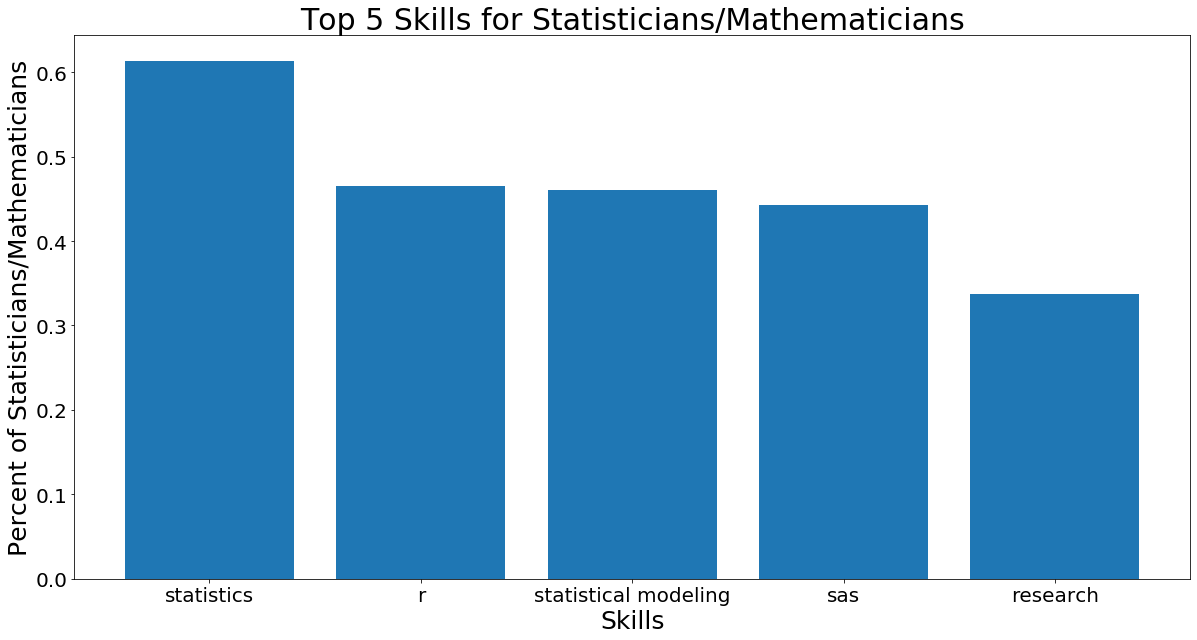

In [92]:
statistics_top_5_skills = stats_top_counts.head(5)
statistics_top_5_x_axis = statistics_top_5_skills.skills.tolist()
statistics_top_5_y_axis = statistics_top_5_skills.percent.tolist()

plots.figure(figsize=(20, 10))
plots.bar(statistics_top_5_x_axis, statistics_top_5_y_axis, color = "tab:blue")
plots.title("Top 5 Skills for Statisticians/Mathematicians", size = 30)
plots.xlabel("Skills", size = 25)
plots.ylabel("Percent of Statisticians/Mathematicians", size = 25)
plots.xticks(fontsize=20)
plots.yticks(fontsize=20)
plots.savefig("charts/math_stats.png")
plots.show()

# GOOD

In [93]:
# Top Skills for Data StoryTellers RIGHT

storytellers_list_list = storytellers.Skills.tolist()
storytellers_skills_combined = []
for i in storytellers_list_list:
    for j in i:
        storytellers_skills_combined.append(j)

new_storytellers_combined = []
for p in storytellers_skills_combined:
    if p in storyteller:
        new_storytellers_combined.append(p)

# apes = []
# for i in new_storytellers_combined:
#     if (i == "analysis"):
#         i = "data " + i
#         apes.append(i)
#     else:
#         apes.append(i)

c = pd.DataFrame(new_storytellers_combined)
storyteller_top_counts = c[0].value_counts().to_frame()
storyteller_top_counts.index.name = "skills"
storyteller_top_counts.reset_index(inplace=True)
storyteller_top_counts = storyteller_top_counts.rename(columns = {0: "count"})

storyteller_arr = []
for i, row in storyteller_top_counts.iterrows():
    row_countz = row["count"]
    l = row_countz / len(storytellers)
    storyteller_arr.append(l)

storyteller_top_counts["percent"] = storyteller_arr
storyteller_top_counts.head(10)

,skills,count,percent
0,data analysis,1032,0.604569
1,microsoft excel,586,0.343292
2,analytics,546,0.319859
3,microsoft office,498,0.291740
4,python,439,0.257176
5,business analysis,436,0.255419
6,analysis,436,0.255419
7,r,414,0.242531
8,financial analysis,350,0.205038
9,public speaking,240,0.140598


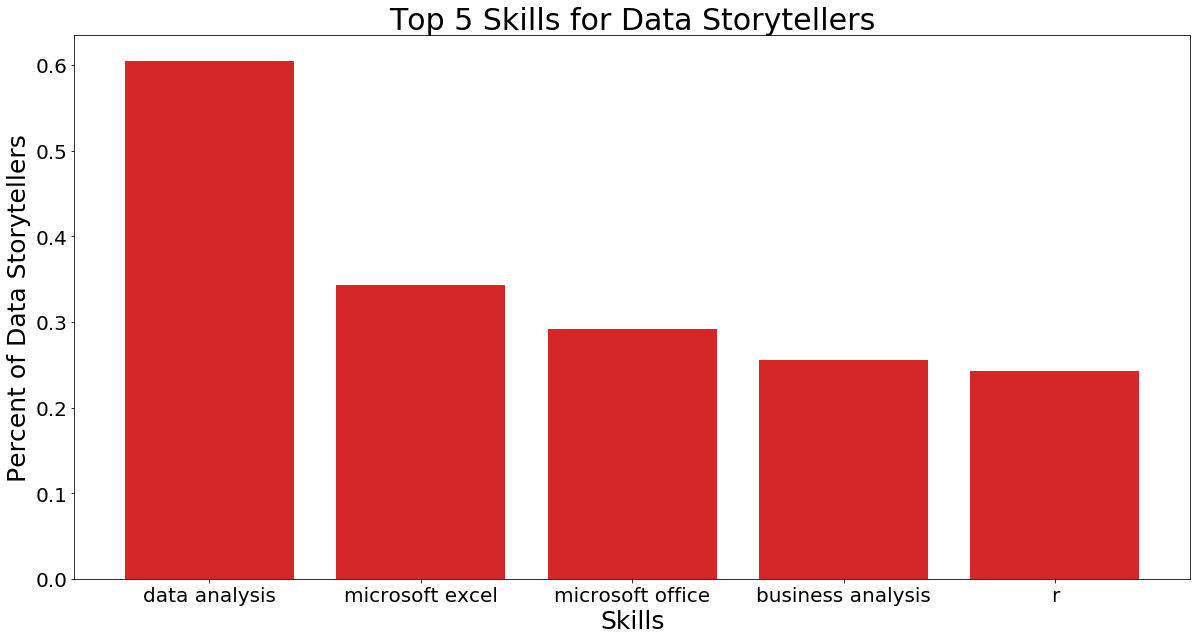

In [94]:
storytellers_top_5_skills = storyteller_top_counts.iloc[[0, 1, 3, 5, 7]]
storytellers_top_5_x_axis = storytellers_top_5_skills.skills.tolist()
storytellers_top_5_y_axis = storytellers_top_5_skills.percent.tolist()

plots.figure(figsize=(20, 10))
plots.bar(storytellers_top_5_x_axis, storytellers_top_5_y_axis, color = "tab:red")
plots.title("Top 5 Skills for Data Storytellers", size = 30)
plots.xlabel("Skills", size = 25)
plots.ylabel("Percent of Data Storytellers", size = 25)
plots.xticks(fontsize=20)
plots.yticks(fontsize=20)
plots.savefig("charts/storytellers.png")

plots.show()

# GOOD

In [95]:
# Top Skills for Data Eng/Architects TOP

eng_list_list = programmers.Skills.tolist()
eng_combined = []
for i in eng_list_list:
    for j in i:
        eng_combined.append(j)

new_eng_combined = []
for p in eng_combined:
    if p in programmer:
        new_eng_combined.append(p)

# res = []
# for i in new_storytellers_combined:
#     if (i == "analysis"):
#         i = "data " + i
#         apes.append(i)
#     else:
#         apes.append(i)

d = pd.DataFrame(new_eng_combined)
eng_top_counts = d[0].value_counts().to_frame()
eng_top_counts.index.name = "skills"
eng_top_counts.reset_index(inplace=True)
eng_top_counts = eng_top_counts.rename(columns = {0: "count"})

eng_arr = []
for i, row in eng_top_counts.iterrows():
    row_countz = row["count"]
    l = row_countz / len(programmers)
    eng_arr.append(l)

eng_top_counts["percent"] = eng_arr
eng_top_counts.head(10)

,skills,count,percent
0,software development,851,0.410714
1,agile methodologies,821,0.396236
2,sql,697,0.336390
3,sdlc,667,0.321911
4,data warehousing,654,0.315637
5,enterprise architecture,601,0.290058
6,java,591,0.285232
7,cloud computing,553,0.266892
8,integration,540,0.260618
9,requirements analysis,497,0.239865


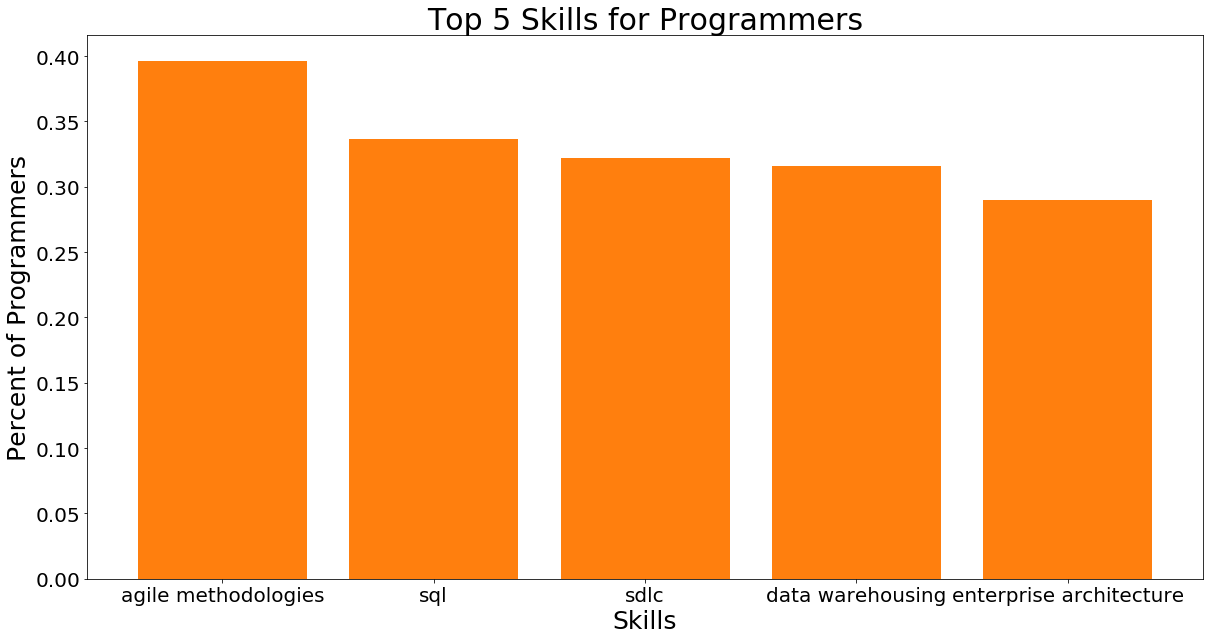

In [96]:
eng_top_5_skills = eng_top_counts.iloc[[1, 2, 3, 4, 5]]
eng_top_5_x_axis = eng_top_5_skills.skills.tolist()
eng_top_5_y_axis = eng_top_5_skills.percent.tolist()

plots.figure(figsize=(20, 10))
plots.bar(eng_top_5_x_axis, eng_top_5_y_axis, color = "tab:orange")
plots.title("Top 5 Skills for Programmers", size = 30)
plots.xlabel("Skills", size = 25)
plots.ylabel("Percent of Programmers", size = 25)
plots.xticks(fontsize=20)
plots.yticks(fontsize=20)
plots.savefig("charts/programmers.png")
plots.show()

# Agile, SQL, sdlc, warehousing, enterprise architecture

In [97]:
# Top Skills for Domain Experts Bottom

dom_list_list = domain_experts.Skills.tolist()
dom_combined = []
for i in dom_list_list:
    for j in i:
        dom_combined.append(j)

new_dom_combined = []
for p in dom_combined:
    if p in domain_expert:
        new_dom_combined.append(p)
    
# beep = []
# for i in new_dom_combined:
#     if (i == "project management") or (i == "program management") or (i == "vendor management"):
#         i = "management"
#         beep.append(i)
#     else:
#         beep.append(i)

e = pd.DataFrame(new_dom_combined)
dom_top_counts = e[0].value_counts().to_frame()
dom_top_counts.index.name = "skills"
dom_top_counts.reset_index(inplace=True)
dom_top_counts = dom_top_counts.rename(columns = {0: "count"})

dom_arr = []
for i, row in dom_top_counts.iterrows():
    row_countz = row["count"]
    l = row_countz / len(domain_experts)
    dom_arr.append(l)

dom_top_counts["percent"] = dom_arr
dom_top_counts.head(10)

,skills,count,percent
0,management,995,0.406454
1,project management,977,0.399101
2,strategy,900,0.367647
3,leadership,818,0.334150
4,program management,771,0.314951
5,vendor management,730,0.298203
6,business intelligence,681,0.278186
7,it strategy,618,0.252451
8,process improvement,617,0.252042
9,strategic planning,607,0.247958


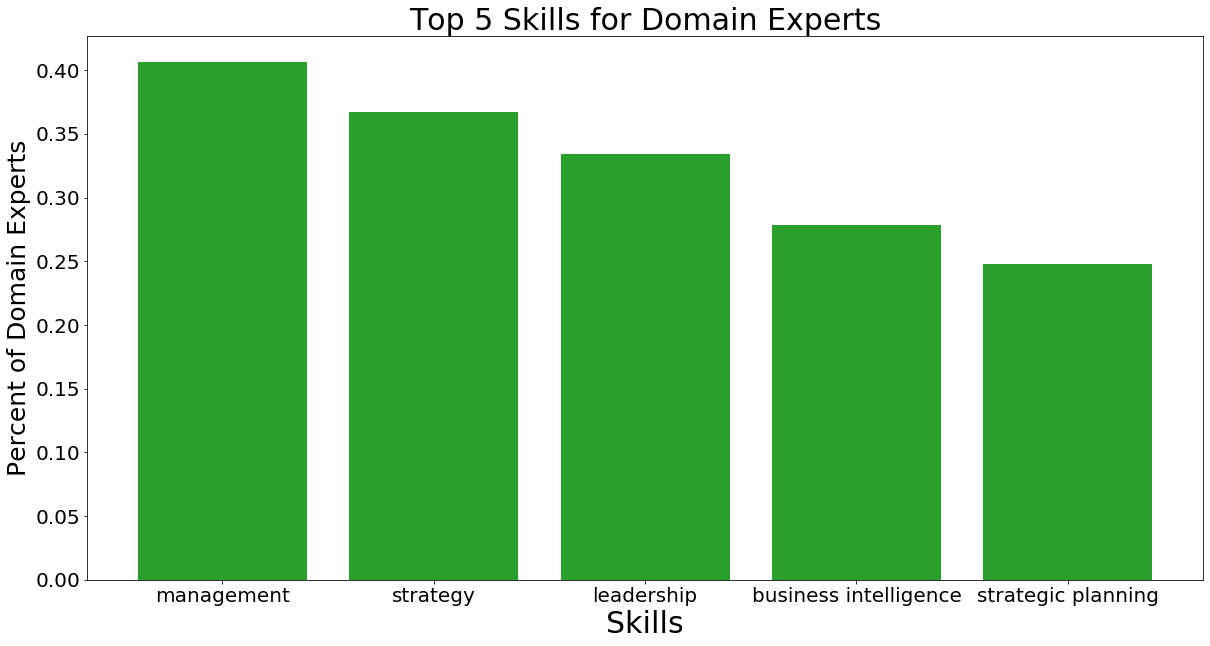

In [98]:
dom_top_5_skills = dom_top_counts.iloc[[0, 2, 3, 6, 9]]
dom_top_5_x_axis = dom_top_5_skills.skills.tolist()
dom_top_5_y_axis = dom_top_5_skills.percent.tolist()

plots.figure(figsize=(20, 10))
plots.bar(dom_top_5_x_axis, dom_top_5_y_axis, color = "tab:green")
plots.title("Top 5 Skills for Domain Experts", size = 30)
plots.xlabel("Skills", size = 30)
plots.ylabel("Percent of Domain Experts", size = 25)
plots.xticks(fontsize=20)
plots.yticks(fontsize=20)
plots.savefig("charts/domain_experts.png")
plots.show()

# management, strategy, leadership, business intelligence, strategic planning

In [99]:
df.loc[df.Name == "Darren Kaplan"]

,Name,Title,Summary,Skills,Type
2598,Darren Kaplan,Founder | Podcaster | Top 20 Influencer in Dat...,Every so often we are fortunate enough to be p...,"[venture capital, business development, corpor...",Domain Expert


In [100]:
# Matt's edited subtitle
# New charts
# Fix scaling algorithm
# Revise questions
# Hyperlinks to DS and Pandio
# LinkedIn share feature
# Standardized Email (Teaser)
# Top 10 list of in influencers to spread
# Standardized linkedin post for all the data standard peeps
# Zapier connect integration
# Post on DS website



Infleucners List: Ken Jee, Eugene Hayden, Dushyanth Sekhar, Christina Stathopoulos, Patrick Fernandez, Kevin Lewis, Nick Heudecker